Original Dataset Shape: (2000, 19)
   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage    Price  Distance_to_School  Distance_to_Hospital  \
0     No   445832                 1.2                   3.9   
1     No  1033459                 2.9                   3.3   
2     No   885836                 2.2                   3.7   
3    Yes   393234                 4.4                   5.6   
4    Yes  1068197                 1.8                   1.5   

   Distance_to_Transport  Distance_to_Center     Property_Type  Has_Pool  \
0                    0.3                 2.1         

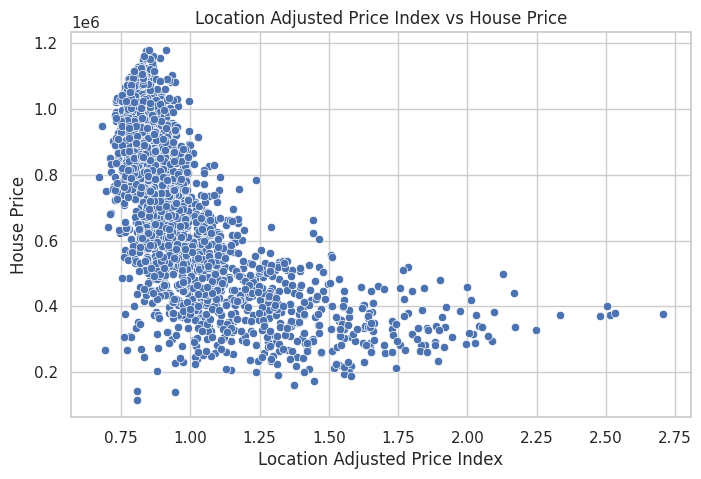

📊 Correlation with Price: -0.653


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)


INPUT_FILE = "House Price Prediction Dataset_Rich_v4.csv"
OUTPUT_FILE = "dataset_with_best_price_parameter2.csv"


df = pd.read_csv(INPUT_FILE)

print("Original Dataset Shape:", df.shape)
print(df.head())

def add_location_adjusted_price_index(df):
    """
    Adds Location Adjusted Price Index (LAPI)
    without modifying the original dataset.
    """
    data = df.copy()
    eps = 1e-6
    data["PricePerSqFt"] = data["Price"] / (data["Area"] + eps)


    avg_price_sqft_location = (
        data.groupby("Location")["PricePerSqFt"]
        .mean()
    )

    data["AvgPricePerSqFt_Location"] = data["Location"].map(
        avg_price_sqft_location
    )


    data["LocationAdjustedPriceIndex"] = (
        data["PricePerSqFt"] /
        (data["AvgPricePerSqFt_Location"] + eps)
    )

    return data


df_best = add_location_adjusted_price_index(df)


df_best.to_csv(OUTPUT_FILE, index=False)


print(" Original file preserved:", INPUT_FILE)
print("New file created:", OUTPUT_FILE)
print("\nPreview of new feature:")
print(df_best[[
    "Price",
    "Area",
    "Location",
    "LocationAdjustedPriceIndex"
]].head())

plt.figure()
sns.scatterplot(
    x=df_best["LocationAdjustedPriceIndex"],
    y=df_best["Price"]
)
plt.title("Location Adjusted Price Index vs House Price")
plt.xlabel("Location Adjusted Price Index")
plt.ylabel("House Price")
plt.show()

corr_value = df_best[
    ["Price", "LocationAdjustedPriceIndex"]
].corr().iloc[0,1]

print(f"📊 Correlation with Price: {corr_value:.3f}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


file_path = "/content/House Price Prediction Dataset_Rich_v4.csv"
raw_df = pd.read_csv(file_path)

df = raw_df.copy()
print("Dataset loaded")


numerical_cols = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Price']
categorical_cols = ['Location', 'Condition', 'Garage']

# Numerical → median
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values handled")


for col in ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = np.clip(df[col], lower, upper)

print("Outliers capped")


df = pd.get_dummies(df, columns=['Location', 'Condition'], drop_first=True)


df['Garage'] = df['Garage'].map({'Yes': 1, 'No': 0})

print("Categorical encoding done")


CURRENT_YEAR = 2026

df['House_Age'] = CURRENT_YEAR - df['YearBuilt']

df['Price_per_SqFt'] = df['Price'] / df['Area']

df['Bath_Bed_Ratio'] = df['Bathrooms'] / (df['Bedrooms'] + 0.0001)

df['Is_New_House'] = (df['House_Age'] < 5).astype(int)

df['Garage_Binary'] = df['Garage']

df['Condition_Score'] = (
    df.get('Condition_Excellent', 0) * 4 +
    df.get('Condition_Good', 0) * 3 +
    df.get('Condition_Fair', 0) * 2 +
    df.get('Condition_Poor', 0) * 1
)

df['Location_Score'] = (
    df.get('Location_Urban', 0) * 3 +
    df.get('Location_Suburban', 0) * 2 +
    df.get('Location_Rural', 0) * 1
)

print("Feature engineering completed")



scale_cols = [
    'Area', 'Bedrooms', 'Bathrooms', 'Floors',
    'YearBuilt', 'House_Age', 'Bath_Bed_Ratio'
]

scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

print("Feature scaling applied")


output_path = "/content/House_Price_Preprocessed_FeatureEngineered1.csv"
df.to_csv(output_path, index=False)

print("✅ New CSV file created successfully!")
print(f"📁 Saved at: {output_path}")
print("Final shape:", df.shape)


Dataset loaded
Missing values handled
Outliers capped
Categorical encoding done
Feature engineering completed
Feature scaling applied
✅ New CSV file created successfully!
📁 Saved at: /content/House_Price_Preprocessed_FeatureEngineered1.csv
Final shape: (2000, 30)


/tmp/ipython-input-3472059206.py:18: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-3472059206.py:21: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import numpy as np
numerical_cols = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Price']
categorical_cols = ['Location', 'Condition', 'Garage']
print("[MODULE 3] GENERATING VISUALIZATIONS")

fig1 = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Price Histogram", "Price Box Plot")
)

fig1.add_trace(
    go.Histogram(x=raw_df['Price'], nbinsx=30, name='Price'),
    row=1, col=1
)

fig1.add_trace(
    go.Box(y=raw_df['Price'], name='Price'),
    row=1, col=2
)

fig1.update_layout(title="Target Variable Analysis: House Prices")
fig1.show()
corr = raw_df[numerical_cols].corr()

fig2 = go.Figure(
    data=go.Heatmap(
        z=corr.values,
        x=corr.columns,
        y=corr.columns,
        colorscale='RdBu_r',
        text=np.round(corr.values, 2),
        texttemplate="%{text}"
    )
)

fig2.update_layout(title="Correlation Heatmap (Numerical Features)")
fig2.show()
fig3 = px.scatter(
    raw_df,
    x='Area',
    y='Price',
    color='Location',
    size='Bedrooms',
    trendline='ols',
    hover_data=['Condition', 'Garage', 'YearBuilt'],
    title="Area vs Price"
)
fig3.show()
fig4 = make_subplots(
    rows=1, cols=3,
    subplot_titles=("Location", "Condition", "Garage")
)

fig4.add_trace(go.Box(x=raw_df['Location'], y=raw_df['Price']), row=1, col=1)
fig4.add_trace(go.Box(x=raw_df['Condition'], y=raw_df['Price']), row=1, col=2)
fig4.add_trace(go.Box(x=raw_df['Garage'], y=raw_df['Price']), row=1, col=3)

fig4.update_layout(title="Price Distribution Across Categorical Features")
fig4.show()
fig5 = make_subplots(
    rows=2, cols=3,
    subplot_titles=numerical_cols
)

for i, col in enumerate(numerical_cols):
    fig5.add_trace(
        go.Histogram(x=raw_df[col], nbinsx=25, name=col),
        row=(i // 3) + 1,
        col=(i % 3) + 1
    )

fig5.update_layout(title="Distribution of Numerical Features")
fig5.show()
fig6 = make_subplots(
    rows=1, cols=3,
    subplot_titles=("Location", "Condition", "Garage")
)

for i, col in enumerate(categorical_cols):
    avg_price = raw_df.groupby(col)['Price'].mean()

    fig6.add_trace(
        go.Bar(
            x=avg_price.index,
            y=avg_price.values,
            text=np.round(avg_price.values, 0),
            textposition='auto',
            name=col
        ),
        row=1, col=i+1
    )

fig6.update_layout(title="Average House Price by Category")
fig6.show()
fig7 = px.scatter_3d(
    raw_df,
    x='Area',
    y='Bedrooms',
    z='Price',
    color='Location',
    size='Bathrooms',
    hover_data=['Condition', 'Garage'],
    title="3D Relationship: Area, Bedrooms & Price"
)
fig7.show()
avg_price_year = raw_df.groupby('YearBuilt')['Price'].mean()
count_year = raw_df.groupby('YearBuilt').size()

fig8 = make_subplots(
    rows=2, cols=1,
    subplot_titles=("Average Price by Year Built", "Number of Houses")
)

fig8.add_trace(
    go.Scatter(x=avg_price_year.index, y=avg_price_year.values, mode='lines'),
    row=1, col=1
)

fig8.add_trace(
    go.Bar(x=count_year.index, y=count_year.values),
    row=2, col=1
)

fig8.update_layout(title="Trends by Construction Year")
fig8.show()
pivot = raw_df.pivot_table(
    values='Price',
    index='Location',
    columns='Condition',
    aggfunc='mean'
)

fig9 = go.Figure(
    data=go.Heatmap(
        z=pivot.values,
        x=pivot.columns,
        y=pivot.index,
        colorscale='Viridis',
        text=np.round(pivot.values, 0),
        texttemplate="$%{text}"
    )
)

fig9.update_layout(title="Average Price Heatmap: Location vs Condition")
fig9.show()


[MODULE 3] GENERATING VISUALIZATIONS
